In [301]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [302]:
df = pd.read_csv('AMZN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,3268.159912,2790600


In [303]:
x = df.iloc[:,1:2].values
x

array([[2.43750000e+00],
       [1.96875000e+00],
       [1.76041700e+00],
       ...,
       [3.23611011e+03],
       [3.27410010e+03],
       [3.27498999e+03]])

In [304]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x, test_size=0.33, random_state=42)

In [305]:
x_train

array([[  49.125   ],
       [  34.150002],
       [  87.949997],
       ...,
       [1485.      ],
       [1795.      ],
       [  27.9375  ]])

In [306]:
x_test

array([[ 41.990002],
       [527.75    ],
       [ 44.049999],
       ...,
       [ 16.35    ],
       [ 49.150002],
       [304.      ]])

In [307]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler(feature_range = (0,1))
x_train = mx.fit_transform(x_train)
x_train

array([[0.01275018],
       [0.00874895],
       [0.023124  ],
       ...,
       [0.39640791],
       [0.47923816],
       [0.007089  ]])

In [308]:
shift = 100
yt = x_train[shift:]
xt = x_train[:-shift]
xt

array([[0.01275018],
       [0.00874895],
       [0.023124  ],
       ...,
       [0.41083908],
       [0.45194425],
       [0.02049214]])

In [309]:
yt

array([[0.08739494],
       [0.01752628],
       [0.00150018],
       ...,
       [0.39640791],
       [0.47923816],
       [0.007089  ]])

In [310]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [311]:
seq = Sequential()
seq.add(LSTM(units = 50, return_sequences=True, input_shape = (xt.shape[1],1)))
seq.add(Dropout(0.02))
seq.add(LSTM(units = 50, return_sequences=True))
seq.add(Dropout(0.02))
seq.add(LSTM(units = 50, return_sequences=True))
seq.add(Dropout(0.02))
seq.add(LSTM(units = 50, return_sequences=True))
seq.add(Dropout(0.02))
seq.add(Dense(units = 1))

In [312]:
seq.compile(optimizer = 'adam', loss = 'mean_squared_error')
seq.fit(xt, yt,epochs = 5)

Epoch 1/5
128/128 [==============================] - 11s 12ms/step - loss: 0.0628
Epoch 2/5
128/128 [==============================] - 1s 8ms/step - loss: 0.0602
Epoch 3/5
128/128 [==============================] - 1s 8ms/step - loss: 0.0604
Epoch 4/5
128/128 [==============================] - 1s 8ms/step - loss: 0.0602
Epoch 5/5
128/128 [==============================] - 1s 8ms/step - loss: 0.0602


In [313]:
xt

array([[0.01275018],
       [0.00874895],
       [0.023124  ],
       ...,
       [0.41083908],
       [0.45194425],
       [0.02049214]])

In [314]:
yt

array([[0.08739494],
       [0.01752628],
       [0.00150018],
       ...,
       [0.39640791],
       [0.47923816],
       [0.007089  ]])

In [315]:
x_test = mx.fit_transform(x_test)
x_test

array([[0.01090358],
       [0.1414455 ],
       [0.01145717],
       ...,
       [0.00401315],
       [0.01282774],
       [0.08131549]])

In [316]:
shift = 100
yT = x_test[shift:]
xT = x_test[:-shift]
xT

array([[0.01090358],
       [0.1414455 ],
       [0.01145717],
       ...,
       [0.05100996],
       [0.02457828],
       [0.21711123]])

In [317]:
yT

array([[0.14999404],
       [0.01906782],
       [0.27029975],
       ...,
       [0.00401315],
       [0.01282774],
       [0.08131549]])

In [318]:
xt = mx.inverse_transform(xt)
xt

array([[  48.86141054],
       [  33.97240067],
       [  87.46347001],
       ...,
       [1530.19133214],
       [1683.14793164],
       [  77.67003082]])

In [319]:
real = seq.predict(yt)
real = real.reshape(-1, 1)
real = mx.inverse_transform(real)
real

128/128 [==============================] - 6s 5ms/step


array([[583.4237 ],
       [585.49585],
       [585.9693 ],
       ...,
       [574.1241 ],
       [571.5988 ],
       [585.80426]], dtype=float32)

In [320]:
pred = seq.predict(xT)
pred = pred.reshape(-1, 1)
pred = mx.inverse_transform(pred)
pred

62/62 [==============================] - 0s 4ms/step


array([[585.69165],
       [581.8125 ],
       [585.67523],
       ...,
       [584.50433],
       [585.28723],
       [579.5453 ]], dtype=float32)

In [321]:
pred.shape[0]

1965

In [322]:
x_test

array([[0.01090358],
       [0.1414455 ],
       [0.01145717],
       ...,
       [0.00401315],
       [0.01282774],
       [0.08131549]])

In [323]:
x_test.shape[0]

2065

In [324]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_pred = mean_squared_error(real[:1000], pred[:1000])
rmse_pred = np.sqrt(mse_pred)
mae_pred = mean_absolute_error(real[:1000], pred[:1000])
print("Mean Squared Error (MSE):", mse_pred)
print("Root Mean Squared Error (RMSE):", rmse_pred)
print("Mean Absolute Error (MAE):", mae_pred)

Mean Squared Error (MSE): 97.1991
Root Mean Squared Error (RMSE): 9.85896
Mean Absolute Error (MAE): 6.036307


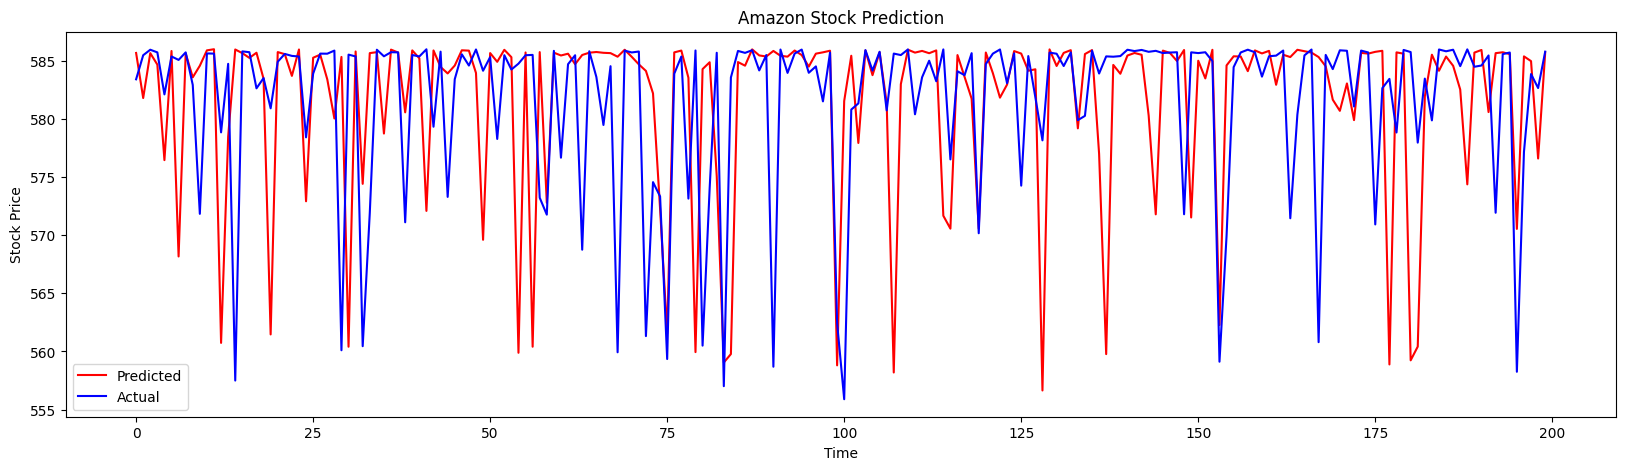

In [325]:
plt.plot(pred[:200] , color='red', label = 'Predicted')
plt.plot(real[:200] , color='blue', label = 'Actual')
plt.xlabel('Time')
plt.ylabel("Stock Price")
plt.title('Amazon Stock Prediction')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(20, 5)